In [1]:
import os 
os.chdir("../../")

In [2]:
import scanpy as sc
import surgeon
import numpy as np
sc.settings.set_figure_params(dpi=200, frameon=False)

Using TensorFlow backend.
/home/mohsen/miniconda3/envs/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mohsen/miniconda3/envs/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mohsen/miniconda3/envs/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mohsen/miniconda3

In [3]:
condition_key = "study"
cell_type_key = 'cell_type'
target_conditions = ["Drop-seq", 'inDrops']

In [4]:
adata = sc.read("./data/pbmc/PBMC_all.h5ad")
adata

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


AnnData object with n_obs × n_vars = 107248 × 1793 
    obs: 'CBC', 'CellType', 'Experiment', 'Method', 'batch', 'bulk_labels', 'cell_type', 'louvain', 'method', 'n_counts', 'n_genes', 'percent_mito', 'study'
    var: 'ENS-0', 'Name-0', 'gene_ids-1', 'n_counts-2', 'gene_ids-3', 'n_cells-3', 'highly_variable-3', 'means-3', 'dispersions-3', 'dispersions_norm-3'
    uns: 'cell_type_colors', 'neighbors', 'study_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'

In [5]:
adata.obs[cell_type_key].value_counts()

CD8+/CD45RA+ Naive Cytotoxic    21975
CD4+/CD25 T Reg                 14112
CD8+ Cytotoxic T                11445
CD14 Monocyte                   11377
CD4 T cell                      10470
Cytotoxic T cell                 6094
B cell                           5981
CD56+ NK                         5859
CD19+ B                          3817
CD8 T cell                       3445
CD4+/CD45RO+ Memory              3126
CD4+/CD45RA+/CD25- Naive T       2793
Dendritic cell                   2183
Natural killer cell              1897
Megakaryocyte                     755
FCGR3A Monocytes                  714
CD16 monocyte                     653
CD34+                             262
Plasmacytoid dendritic cell       247
Hematopoietic stem cell            24
CD4+ T Helper2                     19
Name: cell_type, dtype: int64

In [6]:
adata.obs[condition_key].value_counts()

10x PBMC 68k         68579
10X_3prime            8098
10X_5prime            7378
inDrops               6584
Drop-seq              6584
10x Chromium V2 B     3222
10x Chromium V2 A     3222
10x PBMC 3k           2638
Smart-seq2             526
CEL-Seq2               417
Name: study, dtype: int64

In [7]:
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('B cell', 'B')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('CD4 T cell', 'CD4-T')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('CD4+ T Helper2', 'CD4-T')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('CD4+/CD25 T Reg', 'CD4-T')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('CD4+/CD45RA+/CD25- Naive T', 'CD4-T')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('CD4+/CD45RO+ Memory', 'CD4-T')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('CD8 T cell', 'CD8-T')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('CD8+ Cytotoxic T', 'CD8-T')
# adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('CD8+/CD45RA+ Naive Cytotoxic', 'CD8-T')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('CD14 Monocyte', 'CD14-Mono')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('CD16 monocyte', 'CD16-Mono')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('CD19+ B', 'CD19-B')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('CD34+', 'CD34')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('CD56+ NK', 'CD56-NK')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('Cytotoxic T cell', 'Cytotoxic-T')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('Dendritic cell', 'Dendritic')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('FCGR3A Monocytes', 'F-Mono')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('Hematopoietic stem cell', 'Hematopoietic-Stem')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('Natural killer cell', 'NK')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('Plasmacytoid dendritic cell', 'Plasmacytoid-Dendritic')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('CD8+/CD45RA+ Naive Cytotoxic', 'CD8-T')

In [8]:
adata.obs[condition_key].value_counts()

10x PBMC 68k         68579
10X_3prime            8098
10X_5prime            7378
inDrops               6584
Drop-seq              6584
10x Chromium V2 B     3222
10x Chromium V2 A     3222
10x PBMC 3k           2638
Smart-seq2             526
CEL-Seq2               417
Name: study, dtype: int64

In [9]:
adata.X.min(), adata.X.max()

(0.0, 4.73389)

In [10]:
conditions = adata.obs[condition_key].unique().tolist()

In [11]:
adata_count = sc.AnnData(X=adata.layers['counts'].A)
adata_count.var_names = adata.var_names
adata_count.obs = adata.obs.copy(deep=True)
adata_count

AnnData object with n_obs × n_vars = 107248 × 1793 
    obs: 'CBC', 'CellType', 'Experiment', 'Method', 'batch', 'bulk_labels', 'cell_type', 'louvain', 'method', 'n_counts', 'n_genes', 'percent_mito', 'study'

In [12]:
adata_count.X.min(), adata_count.X.max()

(0.0, 14986.0)

In [13]:
del adata.layers['counts']

In [15]:
adata.X.min(), adata.X.max()

(0.0, 4.73389)

In [17]:
cell_types_to_be_removed = ['Hematopoietic-Stem',]

In [18]:
adata = adata_count.copy()

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [19]:
adata = adata[~adata.obs[cell_type_key].isin(cell_types_to_be_removed)]

In [20]:
adata.X.min(), adata.X.max()

(ArrayView(0., dtype=float32), ArrayView(14986., dtype=float32))

In [21]:
sc.pp.normalize_total(adata, key_added='size_factors')

Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [22]:
adata.X.min(), adata.X.max()

(0.0, 112.73712)

In [24]:
adata.raw = adata_count

In [25]:
adata.write_h5ad("./data/pbmc/pbmc_normalized.h5ad")

... storing 'cell_type' as categorical


In [37]:
sc.set_figure_params(dpi=200)

In [38]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

... storing 'cell_type' as categorical
/home/mohsen/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


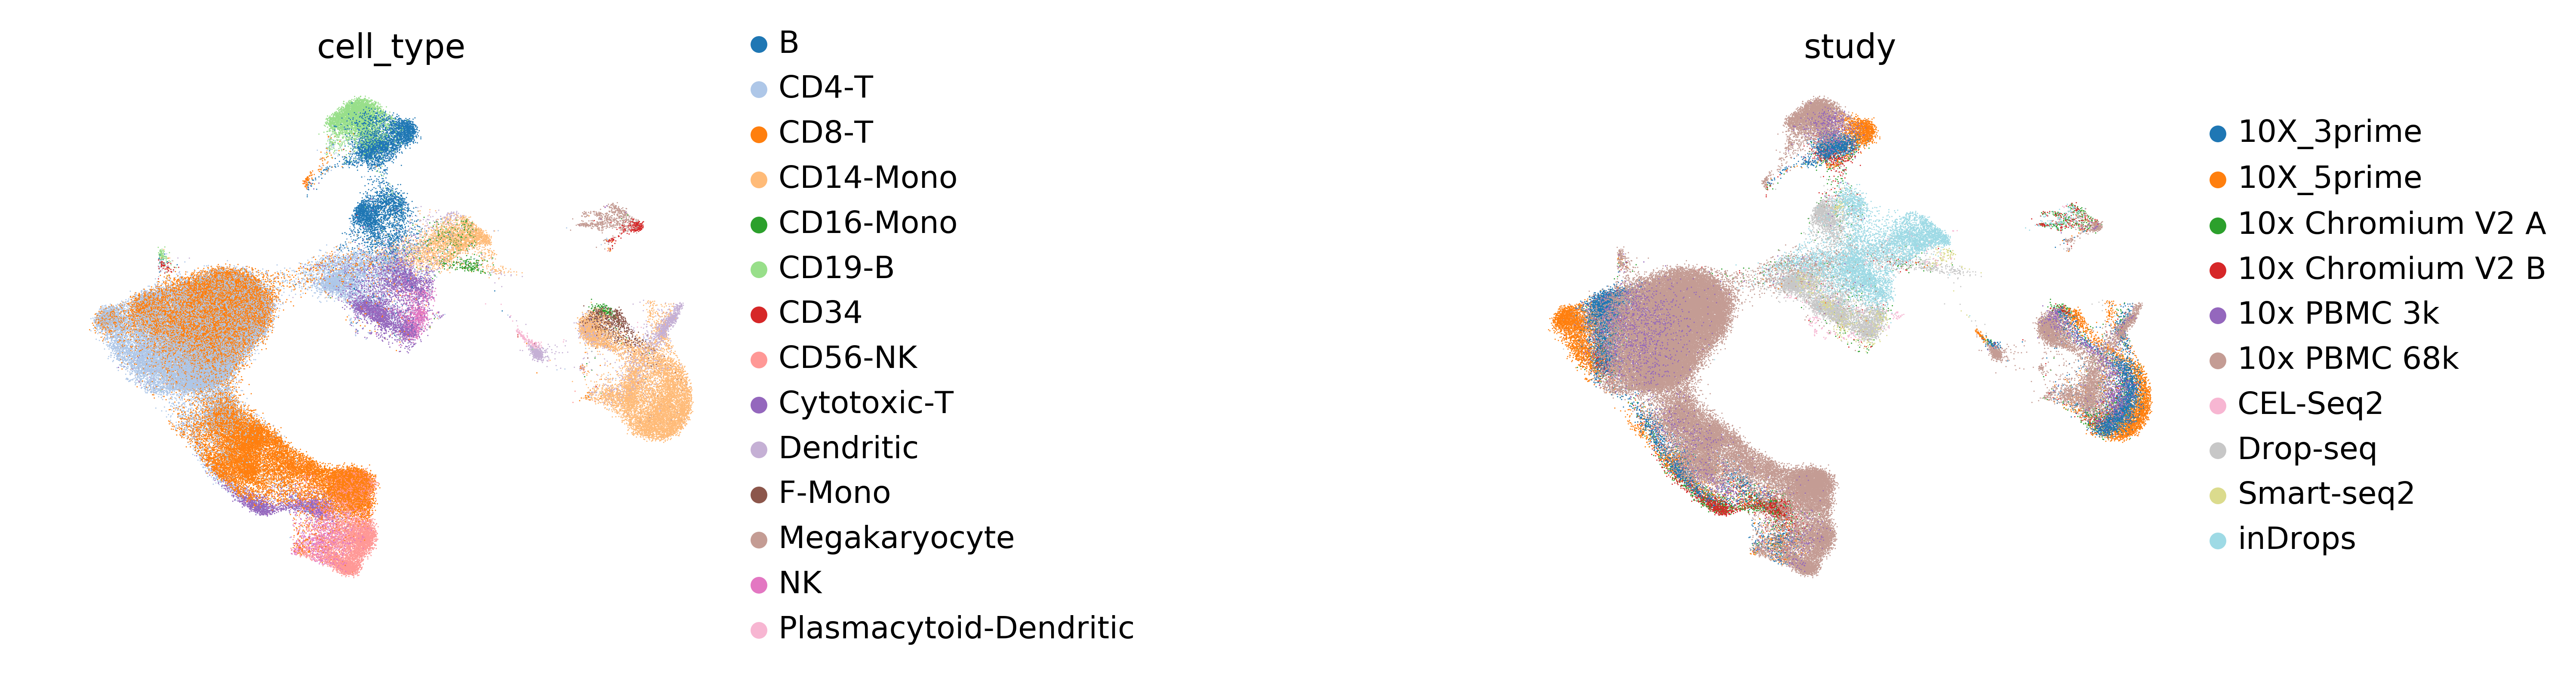

In [39]:
sc.pl.umap(adata, color=[cell_type_key, condition_key], wspace=1.0, frameon=False)